# There's not Much-Room for Error with Mush-rooms

<div style="text-align: right"> <sub><sup>* Pun provided by Abi Pearlman</sup></sub></div> 

## Cleaning
---
The first part in investigating the mushroom dataset will be quality checking and correcting the data where necessary. To do this I first import any necessary packages that my code will depend on, and define functions that will be useful throughout the project. 

### Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Useful Functions 

In [2]:
def key_stats(df):
    
    '''
    Given a data frame, return a description of each column: data type, number of observations, 
    number of na's and list of unique values.
    
    INPUT: pandas DataFrame
    OUTPUT: pandas DataFrame
    
    AUTHOR: Jay Acharya
    '''
    
    dtypes = df.dtypes
    counts = df.count()
    nulls = df.isna().sum()
    uniques = df.apply(pd.unique)
    
    stats = [dtypes, counts, nulls, uniques]
    
    table = pd.concat(stats, axis = 1).reset_index().rename(columns={'index':'Feature', 0:'dtypes', 
                                                                     1:'Count', 2:'NAs', 3:'Uniques'})
    
    return table

In [3]:
def hued_countplots(colour_by):
    
    '''
    Given a feature in the mushroom dataset, display a countplot for each feature 
    in the dataset coloured by the input feature.
    
    INPUT: feature name as a string
    OUTPUT: countplot of each feature
    
    AUTHOR: Amisha Bhojwani
    '''
    
    by_feature = list(mushies.columns)
    by_feature.remove(colour_by)
    
    for col in by_feature:
#         fig = plt.figure()
        ax = plt.subplot()
        sns.countplot(data = mushies, x = col, hue = colour_by)
        plt.xticks(rotation = 45)
        plt.title(col.replace('_', ' ').title())
#         ax.set_xlabel(col.replace('_', ' ').title())
#         fig.savefig('Blog/images/'+col+'.jpg')
        plt.show()
    return

### Import Data
After defining these imports and functions i bring in the raw data and make a handy copy of it to not have to reimport it if playing with the code later.

In [4]:
df = pd.read_csv('../Data/mushrooms.csv')

In [5]:
mushies = df.copy()

In [6]:
mushies.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


 The data is described as: 
 > This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy. 
 *Source: [Mushroom Dataset (Kaggle)](https://www.kaggle.com/uciml/mushroom-classification)*
 
 Let's take a look at a summary of the dataframe by feature: 

In [ ]:
key_stats(mushies)

The names of features have dashes between words rather than underscores, which could be bothersome in Python code later. I also see that the labels within each feature aren't very descriptive. Correcting these will be my first two challenges.

### Renaming columns and category labels
I will start with getting full labels for each category. I copy the data dictionary from kaggle as a string in triple quotes in hopes of turning it into a dictionary that I can use to map the current labels in the raw data.

In [7]:
# FORMAT INTO A DICTIONARY OF DICTIONARIES WHERE SUPER KEYS ARE FEATURE COLUMNS AND INFRA KEYS ARE LABELS
dic = '''class: edible=e, poisonous=p
cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
bruises: bruises=t,no=f
odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
gill-attachment: attached=a,descending=d,free=f,notched=n
gill-spacing: close=c,crowded=w,distant=d
gill-size: broad=b,narrow=n
gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
stalk-shape: enlarging=e,tapering=t
stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
veil-type: partial=p,universal=u
veil-color: brown=n,orange=o,white=w,yellow=y
ring-number: none=n,one=o,two=t
ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d'''

# SPLITTING THE DICTIONARY BY NEWLINE CHARACTERS, SEPARATING FEATURES
dic = dic.split('\n')

In [8]:
# REFORMAT THE DICTIONARY BY APPENDING TO A NEW ONE
mushies_dic = {}
for elem in dic: # iterate through features
    col_split = elem.split(':') # separate feature names from labels
    label_split = col_split[1].strip().split(',') # separate each label
    for lbls in label_split:
        lbls = lbls.replace('=', ':')
        mini_dic = {lbls.split('=')[1].strip(): lbls.split('=')[0].strip() for lbls in label_split} # switch key and value for usability later
    mushies_dic[col_split[0]] = mini_dic # append to new dictionary

Let's see how that worked. First looking at the top most keys, which should be features:

In [ ]:
mushies_dic.keys()

Looks good! The values for these keys should be dictionaries; with keys as the labels in our raw data and their values as the labels from the data dictionary:

In [ ]:
mushies_dic.values()

With this dictionary I can replace the letter labels in our raw data with full words from the data dictionary. Then I can look at the description of each feature again.

In [9]:
mushies = mushies.replace(mushies_dic)
key_stats(mushies)

,Feature,dtypes,Count,NAs,Uniques
0,class,object,8124,0,"[poisonous, edible]"
1,cap-shape,object,8124,0,"[convex, bell, sunken, flat, knobbed, conical]"
2,cap-surface,object,8124,0,"[smooth, scaly, fibrous, grooves]"
3,cap-color,object,8124,0,"[brown, yellow, white, gray, red, pink, buff, ..."
4,bruises,object,8124,0,"[bruises, no]"
5,odor,object,8124,0,"[pungent, almond, anise, none, foul, creosote,..."
6,gill-attachment,object,8124,0,"[free, attached]"
7,gill-spacing,object,8124,0,"[close, crowded]"
8,gill-size,object,8124,0,"[narrow, broad]"
9,gill-color,object,8124,0,"[black, brown, gray, pink, white, chocolate, p..."


In *stalk-root* there is a label called 'missing', and there is only one veil type. But first, I wonder if there are any labels that were in the data dictionary that are not present in our data:

In [10]:
cols, vals = [], []
for col in mushies.columns: # iterate through features
    missing_col = []
    for val in mushies_dic[col].values(): # iterate through labels
        if mushies[col].str.contains(val).any(): # check for matches with the dictionary
            continue
        else: missing_col.append(val)
    if len(missing_col)!=0: cols.append(col), vals.append(missing_col)

dict(zip(cols, vals))

{'gill-attachment': ['descending', 'notched'],
 'gill-spacing': ['distant'],
 'stalk-root': ['cup', 'rhizomorphs'],
 'veil-type': ['universal'],
 'ring-type': ['cobwebby', 'sheathing', 'zone']}

There are four features which could have more labels, meaning the data that has been hypothetically collected may not be representative of the full population of Agaricus and Lepiota genus.

With this identified, we can move on to the next task, renaming the columns with PEP8 friendly syntax:

In [11]:
# CHANGING DF COLNAMES TO HAVE UNDERSCORE INSTEAD OF DASH
old_cnames = mushies.columns
new_cnames = [name.replace('-', '_') for name in old_cnames]
mushies.rename(columns = dict(zip(old_cnames,new_cnames)), inplace = True)

Finally I class missing data as NA and have one last look at the summary.

In [12]:
mushies['stalk_root'].replace('missing', np.nan, inplace = True)

In [13]:
key_stats(mushies)

,Feature,dtypes,Count,NAs,Uniques
0,class,object,8124,0,"[poisonous, edible]"
1,cap_shape,object,8124,0,"[convex, bell, sunken, flat, knobbed, conical]"
2,cap_surface,object,8124,0,"[smooth, scaly, fibrous, grooves]"
3,cap_color,object,8124,0,"[brown, yellow, white, gray, red, pink, buff, ..."
4,bruises,object,8124,0,"[bruises, no]"
5,odor,object,8124,0,"[pungent, almond, anise, none, foul, creosote,..."
6,gill_attachment,object,8124,0,"[free, attached]"
7,gill_spacing,object,8124,0,"[close, crowded]"
8,gill_size,object,8124,0,"[narrow, broad]"
9,gill_color,object,8124,0,"[black, brown, gray, pink, white, chocolate, p..."


In [ ]:
mushies.head()

## EDA 
---
The next step in working with the mushroom data is to understand what the data looks like and how it's distributed. To do this, since the data is all categorical, I use countplots. Because my target variable is binary (a mushroom is either edible or poisonous), i want to view my data with this in mind, to tell if there are any features which may differentiate these classes. 

In [ ]:
# for col in mushies.columns: # iterate through columns and produce a countplot
#     ax = plt.subplot()
#     sns.countplot(data = mushies, x = col)
#     plt.xticks(rotation = 45)
#     ax.set_xlabel(col.replace('_', ' ').title())
#     plt.show()

In [ ]:
hued_countplots('class')

To summarise some takeaway points from these plots:

- There is only one viel type and it is distributed equally between classes; it is a column that can be dropped.
- There seems to be a big difference in the amount of bruising between poisonous and non-poisonous mushrooms.
- Odor could be a reliable predictor of mushroom class as it shows edible and poisonous mushrooms tend to have different smells. <small>*(Based on my mushroom knowledge as a biologist, this could potentially be the key to success for our model! Especially considering how many odourless and edible mushrooms there are in our dataset.)*</small>
- Gill size is generally broader in edible mushrooms and narrower in poisonous. 
- A buff gill colour could be a good indicator of a poisonous mushroom.
- Surface above and below stalk might be able to be differentiated between mushroom classes.
- Spore print colour is quite differentiated between classes.

In [15]:
mushies.drop(columns = 'veil_type', axis = 1, inplace = True)

In [ ]:
# List features we think could relate to class
interesting_features = ['bruises', 'odor', 'gill_size', 'gill_colour', 'stalk_surface_above_ring', 
                        'stalk_surface_below_ring', 'spore_print_color']

## Imputing null or missing values
---
I now create a data frame where i drop the 'stalk_root' feature and a second data frame with only those observations that are missing the values for this variable. 

In [ ]:
# SUPERVISED DATASET WITH NO STALK ROOT
mushies_supervised = mushies.drop(columns = 'stalk_root', axis = 1)
mushies_supervised.to_csv('../Results/mushies_supervised.csv')

In [ ]:
## DATASET WHICH CAN BE USED TO IMPUTE NULLS
mushies.to_csv('../Results/mushies_unsupervised.csv')

I played around with clustering algorithms to try and impute the missing values in stalk root. I end up with predictions from a K-Nearest-Neighbour algorithm (KNN) and a K-Means algorithm (KM). The KNN prediction has good validation metrics, while the KM's optimal number of clusters coincides with the number of unique labels for stalk root present in our data, which sounds promising. Because I haven't had much time to explore the biological meaning of the KM analysis, i'll stick to the supervised approach, which is very reliable anyway.

In [16]:
mushies_imputed = pd.read_csv('../Results/mushies_imputed.csv', index_col = 0)
# key_stats(mushies_imputed)

In [17]:
# make a column indicating if a value is imputed for stalk root
mushies_imputed['stalk_imputed'] = mushies_imputed['knn_stalk_root'].apply(pd.isna)


In [18]:
# merge imputed and original stalk root columns
mushies_imputed['stalk_root'] = mushies_imputed['stalk_root'].fillna(mushies_imputed['knn_stalk_root'])   

# drop purely imputed columns
mushies_imputed.drop(columns = ['kmns_stalk_root', 'knn_stalk_root'], axis = 1, inplace = True)

With missing stalk root values now in the data frame and imputed, lets check over key stats again: 

In [ ]:
key_stats(mushies_imputed)

Great! We have all the data now. We can think about some modelling.
## Modelling
---
### Dependencies

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn import tree
from sklearn.linear_model import LogisticRegression

### Useful functions

In [20]:
def feat_eng(df):
    df = pd.get_dummies(df, columns = features, drop_first = True)
    return df

In [21]:
def dt_feat_importance(dt_model, X_train):
    
    # Extract importances
    importances = dt_model.feature_importances_
    
    # Get the indeces of sorted importances
    sorted_indices = np.argsort(importances)[::-1]
    
    # DataFrame for importances for the function to return
    df_importances = pd.DataFrame(list(zip(list(X_train.columns), importances)), columns = ['Feature', 'Gini_Importance'])
    df_importances = df_importances.sort_values('Gini_Importance', ascending = False).reset_index(drop = True)
    
    summed_imp = [0]
    for value in df_importances['Gini_Importance']:
        summed_imp.append(summed_imp[-1]+value)
        
    df_importances['Summed_Importance'] = summed_imp[1:]
    
    # Barplot for descreasing importances
    plt.figure(figsize = (16,8))
    plt.title("RF Feature Importances")
    plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
    plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
    plt.tight_layout()
    plt.show()
    
    return df_importances

In [22]:
def plot_confmat(y_te, y_pr, neg_label, pos_label):
    ax = plt.subplot()
    
    sns.heatmap(confusion_matrix(y_te, y_pr), annot = True, fmt = 'g')
    
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('Real labels')
    
    ax.set_title('Confusion Matrix')
    
    ax.xaxis.set_ticklabels([neg_label, pos_label])
    ax.yaxis.set_ticklabels([neg_label, pos_label])
    
    return

def plot_roc_auc(y_test, y_pred):
    
    roc_auc = roc_auc_score(y_test, y_pred)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    
    plt.figure()
    plt.title('Receiver operating characteristic')
    plt.plot(fpr, tpr, label = f'KNN (area = {roc_auc:.2f})', color = 'pink')
    plt.legend(loc="lower right")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1],'c--')
     
    plt.show()
    
    return

def full_classification_report(X_tr, X_te, y_tr, y_te, model):
    
    # Train
    y_pred_train = model.predict(X_tr)
    print('###################### TRAIN SET ######################\n\n', 
          classification_report(y_tr, y_pred_train), '\n\n')

    # Test
    y_pred = model.predict(X_te)
    print('###################### TEST SET ######################\n\n', 
          classification_report(y_te, y_pred))
    
    return

### Let's get down to business

Traditionally, mushrooms are identified using mushroom identification guides (actually it's just an obsessive amount of practice, but you have to start somewhere). These guides are much like decision trees, where a question is asked about a mushroom trait, which then takes us down a new line of questioning to identify the type of mushroom, and thus, if it's poisonous. Because of this, I think the most fitting algorithm to run would be a tree-based one. Let's start with running a decision tree with class (edible/poisonous) as the target variable. From there I can figure out some feature importances, which will help me see if the the features I thought were interesting are actually useful to predict whether or not a mushroom is poisonous.

In [23]:
# Define the features and target variables
target = 'class'
features = [feature for feature in list(mushies_imputed.columns) if feature not in target]
# features.remove('stalk_root')

In [24]:
print(features)

['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat', 'stalk_imputed']


In [25]:
# Define X and y 
X = mushies_imputed[features].copy()
y = mushies_imputed[target].copy()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 40)

It's time for some feature engineering. All of our features are categorical so we need to convert them to numerical somehow. I don't like the idea of using a Label Encoder because it might indicate some sort of ordinality between variables, when there isnt. Because of this, it makes more sense to One Hot Encode (OHE) them: 

In [26]:
# Feature engineer training set
X_train_eng = feat_eng(X_train)
y_train_eng = y_train.map({'edible':0, 'poisonous':1})

# Feature engineer test set
X_test_eng = feat_eng(X_test)
y_test_eng = y_test.map({'edible':0, 'poisonous':1})

The only downside to OHE is that for every feature you encode, you have to drop one of it's labels to ensure there's not too much multicollinearity. The risk we run with this method is losing out on some information, and this information might have actually been quite useful to our model. Let's hope this is not the case and we still get a good model! 

In [27]:
# Declare and fit the DecisionTree
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train_eng, y_train_eng)

DecisionTreeClassifier(random_state=42)

In [28]:
full_classification_report(X_train_eng, X_test_eng, y_train_eng, y_test_eng, dt)

###################### TRAIN SET ######################

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2738
           1       1.00      1.00      1.00      2542

    accuracy                           1.00      5280
   macro avg       1.00      1.00      1.00      5280
weighted avg       1.00      1.00      1.00      5280
 


###################### TEST SET ######################

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1470
           1       1.00      1.00      1.00      1374

    accuracy                           1.00      2844
   macro avg       1.00      1.00      1.00      2844
weighted avg       1.00      1.00      1.00      2844



In [ ]:
# plot_confmat(y_test_eng, y_pred, 'poisonous', 'edible')
# plot_roc_auc(y_test_eng, y_pred)

Wow!! Perfect scores!! Recall is what would make sure there are the least amount of false negatives, and it's perfect. Let's check out some feature importances:

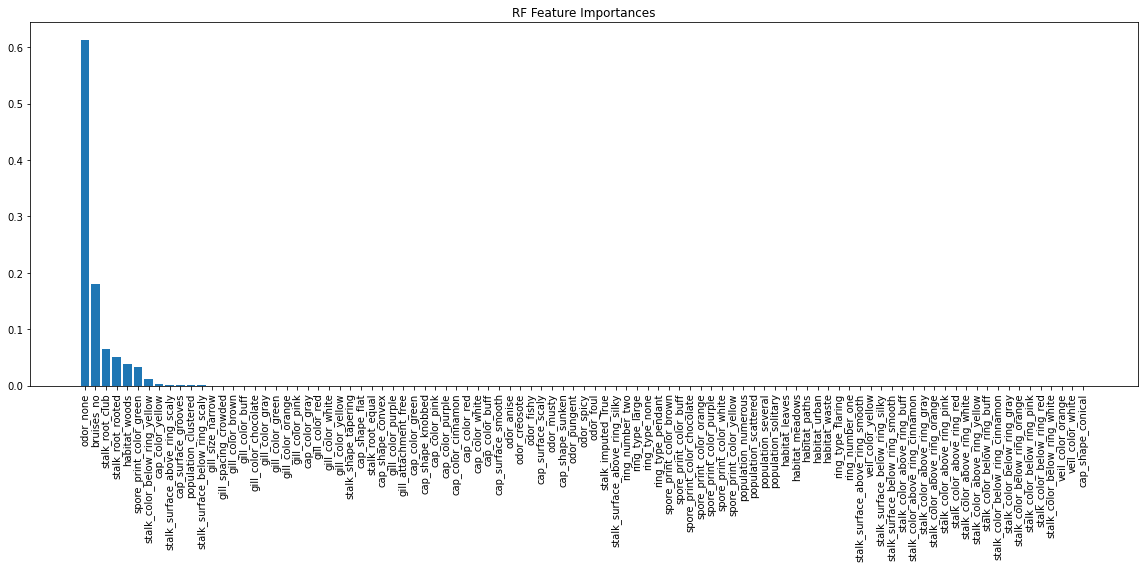

In [29]:
feat_imp = dt_feat_importance(dt, X_train_eng)

In [34]:
feat_imp.round(3).head(15).to_csv('Blog/tables/feature_imp.csv')

Unsurprisingly, a lack of odor is a useful feature in the model (the most useful), and it holds over 60% of the predicitve power in identifying poisonous mushrooms. We also see a few of the other features we thought would be interesting, here's a reminder of them: 

In [ ]:
interesting_features

Seeing these features also identified by the model makes me feel like my EDA was very productive! Let's make a new tree with only the top 12 most important features, since they represent almost 100% of the predictive power of the model.

In [ ]:
# Select features of interest in training and test sets
select_interesting = list(feat_imp['Feature'][:12])
X_train_important = X_train_eng[select_interesting]
X_test_important = X_test_eng[select_interesting]

# Declare and fit the Decision Tree
dt_important = DecisionTreeClassifier(random_state = 42)
dt_important.fit(X_train_important, y_train_eng)

# Test
full_classification_report(X_train_important, X_test_important, y_train_eng, y_test_eng, dt_important)

In [ ]:
# plot_confmat(y_test_eng, y_pred_important, 'edible', 'poisonous')
# plot_roc_auc(y_test_eng, y_pred_important)

Even with just 12 OHE features, we get amazing evaluation metrics. Lets see what this tree looks like, and what decisions it's making:

In [ ]:
plt.figure(figsize = (18,15))
important_tree = plt.subplot()
null_var = tree.plot_tree(dt_important,
                          rounded = True,
                          feature_names = select_interesting,
                          class_names = ['edible', 'poisonous'], # dt_important.classes_ = [0,1]
                          filled = True,
                          ax = important_tree)
important_tree

This means using this decision tree will tell us if a mushroom is poisonous after asking at most 9 questions about the mushroom traits, thats pretty good!

Lets have a look at a logistic regression too, for peace of mind.

In [ ]:
# For all the features OHE
lr = LogisticRegression(random_state = 40)
lr.fit(X_train_eng, y_train_eng)

# Test
full_classification_report(X_train_eng, X_test_eng, y_train_eng, y_test_eng, lr)

In [ ]:
# For only the most important features
lr_important = LogisticRegression(random_state = 40)
lr_important.fit(X_train_important, y_train_eng)

# Test
full_classification_report(X_train_important, X_test_important, y_train_eng, y_test_eng, lr_important)
# plot_confmat(y_test_eng, y_pred_logreg_important, 'edible', 'poisonous')

Train and test scores are the same - indicating good model performance. I would use the decision tree if you're out mushroom picking, especially if you're unsure about your foraging skills!


---
#### EXTRA MODEL FOR THE SANITY OF THE BIOLOGIST IN ME



In [ ]:
# I know odor is enough to tell if a mushroom is poisonous or not. 
# Lets make a Logistic regression with only OHE odor as features. The feature left out will be almond by default, 
# as it is the first label in the feature alphabetically. Since all almond smelling mushrooms in our dataset 
# are edible, we are not unintentionally losing information about our target variable.

X_train_extra = feat_eng(X_train['odor'])
X_test_extra = feat_eng(X_test['odor'])

lr_extra = LogisticRegression(random_state = 40)
lr_extra.fit(X_train_extra, y_train_eng)

# Test
full_classification_report(X_train_extra, X_test_extra, y_train_eng, y_test_eng, lr_extra)

In [ ]:
# plot_confmat(y_test_eng, y_pred_logreg_extra, 'edible', 'poisonous')
# plot_roc_auc(y_test_eng, y_pred_logreg_extra)

In [ ]:
# Our recall for poisonous mushrooms is high in the test set, although we do predict some false negatives (saying a mushroom 
# is edible when it isn't). This could also be a good predictive model, but considering there is error (which can cause 
# death), you could practice you poisonous mushroom detection as a human instead (or use the decision tree from above). 
# Happy mushrooming!